In [1]:
# importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importation des données

data = pd.read_csv('winequality-white.csv', sep = ';')
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [28]:
# Création de 2 tabmeaux : X qui contient les caractéristiques des boissons et 
# y qui contient la qualité
X = data[data.columns[:-1]].values
y = data['quality'].values

In [29]:
# Transformation du problème en classification binaire
y_class = np.where(y < 6, 0, 1)
print(y_class)

[1 1 1 ... 1 1 1]


In [30]:
# training and testing set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y_class, test_size = 0.2)

In [31]:
# Standardisation des données de training and testing set pou
# que les grandes valeurs n'écrasent pas les petites (normalisation)

from sklearn import preprocessing
std = preprocessing.StandardScaler().fit(X)
xtrain_std = std.transform(xtrain)
xtest_std = std.transform(xtest)

In [8]:
# Modélisation 
!pip install tensorflow
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [80]:
# Instance de modèle
model = Sequential()

In [81]:
# structure du réseau
model.add(Dense(20, activation = 'relu', input_shape = (11,)))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [82]:
# configuration du modèle
model.get_config()

{'name': 'sequential_8',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_12_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_12',
    'trainable': True,
    'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'units': 20,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_13',
    'trainable': True,
    'dtype': 'float32',
    'units': 10,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bi

In [83]:
# compile 
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [84]:
# Ajustement sur les données d'entrainement
model.fit(xtrain_std, ytrain, 
         epochs = 300)

Epoch 1/300
123/123 [==============================] - 0s 821us/step - loss: 0.6181 - accuracy: 0.6501
Epoch 2/300
123/123 [==============================] - 0s 916us/step - loss: 0.5398 - accuracy: 0.7241
Epoch 3/300
123/123 [==============================] - 0s 931us/step - loss: 0.5084 - accuracy: 0.7506
Epoch 4/300
123/123 [==============================] - 0s 961us/step - loss: 0.4911 - accuracy: 0.7677
Epoch 5/300
123/123 [==============================] - 0s 1ms/step - loss: 0.4826 - accuracy: 0.7708
Epoch 6/300
123/123 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7711
Epoch 7/300
123/123 [==============================] - 0s 1ms/step - loss: 0.4736 - accuracy: 0.7728
Epoch 8/300
123/123 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.7759
Epoch 9/300
123/123 [==============================] - 0s 1ms/step - loss: 0.4680 - accuracy: 0.7774
Epoch 10/300
123/123 [==============================] - 0s 1ms/step - loss: 0.4658 

123/123 [==============================] - 0s 1ms/step - loss: 0.4046 - accuracy: 0.8142
Epoch 81/300
123/123 [==============================] - 0s 1ms/step - loss: 0.4041 - accuracy: 0.8157
Epoch 82/300
123/123 [==============================] - 0s 1ms/step - loss: 0.4036 - accuracy: 0.8152
Epoch 83/300
123/123 [==============================] - 0s 1ms/step - loss: 0.4035 - accuracy: 0.8137
Epoch 84/300
123/123 [==============================] - 0s 1ms/step - loss: 0.4024 - accuracy: 0.8127
Epoch 85/300
123/123 [==============================] - 0s 990us/step - loss: 0.4018 - accuracy: 0.8201
Epoch 86/300
123/123 [==============================] - 0s 952us/step - loss: 0.4021 - accuracy: 0.8116
Epoch 87/300
123/123 [==============================] - 0s 956us/step - loss: 0.4012 - accuracy: 0.8190
Epoch 88/300
123/123 [==============================] - 0s 968us/step - loss: 0.4003 - accuracy: 0.8170
Epoch 89/300
123/123 [==============================] - 0s 957us/step - loss: 0.3995 - 

Epoch 159/300
123/123 [==============================] - 0s 1ms/step - loss: 0.3775 - accuracy: 0.8300
Epoch 160/300
123/123 [==============================] - 0s 1ms/step - loss: 0.3774 - accuracy: 0.8277
Epoch 161/300
123/123 [==============================] - 0s 927us/step - loss: 0.3776 - accuracy: 0.8295
Epoch 162/300
123/123 [==============================] - 0s 890us/step - loss: 0.3763 - accuracy: 0.8300
Epoch 163/300
123/123 [==============================] - 0s 903us/step - loss: 0.3768 - accuracy: 0.8270
Epoch 164/300
123/123 [==============================] - 0s 1ms/step - loss: 0.3770 - accuracy: 0.8272
Epoch 165/300
123/123 [==============================] - 0s 1ms/step - loss: 0.3761 - accuracy: 0.8292
Epoch 166/300
123/123 [==============================] - 0s 1ms/step - loss: 0.3764 - accuracy: 0.8264
Epoch 167/300
123/123 [==============================] - 0s 966us/step - loss: 0.3759 - accuracy: 0.8300
Epoch 168/300
123/123 [==============================] - 0s 932us

123/123 [==============================] - 0s 970us/step - loss: 0.3635 - accuracy: 0.8341
Epoch 238/300
123/123 [==============================] - 0s 972us/step - loss: 0.3611 - accuracy: 0.8387
Epoch 239/300
123/123 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8351
Epoch 240/300
123/123 [==============================] - 0s 990us/step - loss: 0.3603 - accuracy: 0.8384
Epoch 241/300
123/123 [==============================] - 0s 969us/step - loss: 0.3626 - accuracy: 0.8344
Epoch 242/300
123/123 [==============================] - 0s 924us/step - loss: 0.3622 - accuracy: 0.8346
Epoch 243/300
123/123 [==============================] - 0s 864us/step - loss: 0.3608 - accuracy: 0.8361
Epoch 244/300
123/123 [==============================] - 0s 834us/step - loss: 0.3613 - accuracy: 0.8328
Epoch 245/300
123/123 [==============================] - 0s 829us/step - loss: 0.3610 - accuracy: 0.8377
Epoch 246/300
123/123 [==============================] - 0s 866us/step 

In [86]:
# prédiction
ypred = model.predict(xtest_std)

# Evaluation
score = model.evaluate(xtest_std, ytest)
print(score)

31/31 [==============================] - 0s 1ms/step - loss: 0.5575 - accuracy: 0.7408
[0.5574977397918701, 0.7408163547515869]


In [87]:
[fpr, tpr, thr] = metrics.roc_curve(ytest, ypred)

In [88]:
# AUROC
auroc = metrics.auc(fpr,tpr)
print(auroc)

0.8040350248348609


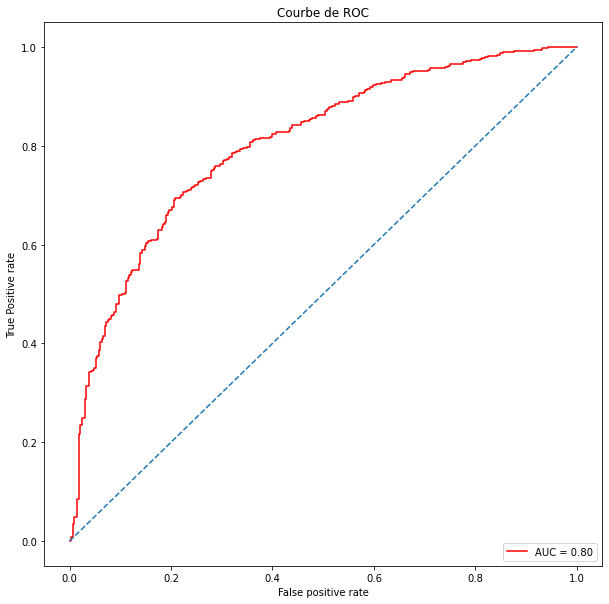

In [89]:
# courbe de ROC
plt.figure(figsize=(10,10))
plt.title("Courbe de ROC")
plt.plot(fpr, tpr, color = 'red',
        label = 'AUC = %0.2f' % auroc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.show()